In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text cleaning
import re, string

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 432x288 with 0 Axes>

In [2]:
data_path = r"/content/drive/MyDrive/malConv_data/Acctual_data/malware"

df = pd.DataFrame({'text' : [], 'sentiment' : []})
class_labels = {}

for idx, label in enumerate(os.listdir(data_path)):
  class_labels[idx] = label

  label_dir = os.path.join(data_path, label)
  for opc_file_path in os.listdir(label_dir):
    opc_path = os.path.join(label_dir, opc_file_path)
    f = open(opc_path, mode='r', encoding='cp1252')

    mal_opcode = []
    for i in f:
      mal_opcode.append(i[:-1])

    mal_opcode = " ".join(mal_opcode)
    
    df1 = pd.DataFrame({'text' : [mal_opcode], 'sentiment' : [label]})
    df = pd.concat([df, df1])


df = df.sample(frac = 1)    
df.head()

,text,sentiment
0,5b700e 700e 5b11 5411 5b11 5411 705b5b590e 082...,GoldDream
0,1a710e 700e 1a691a691a690e 700e 2270690e 700e ...,AnserverBot
0,705b0e 54710c12546e0c710c6e0a381a546e38546e0e6...,Pjapps
0,700e 5b700e 720e 5b59700e 546e0a3954526e0e 5b7...,Benign
0,5b70125c0e 700e 5411 13121212541a6e0c1f6e0a396...,Benign


In [3]:
sentiments = list(df.sentiment.unique())

labels_dict = {lab : i for i, lab in enumerate(sentiments)}
df['sentiment'] = df['sentiment'].replace(labels_dict)

In [4]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [5]:
vector_len = max_len = 1000
vocabulary, tokenized_column = Tokenize(df["text"], max_len)

In [6]:
X = tokenized_column.astype(np.double)
y = df['sentiment'].values

In [7]:
X.shape

(2147, 1000)

In [8]:
y.shape

(2147,)

In [9]:
X[0]

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=seed_value)

In [11]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train),np.array(y_train));

In [12]:
(unique, counts) = np.unique(y_train_os, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 641],
       [  1, 641],
       [  2, 641],
       [  3, 641],
       [  4, 641],
       [  5, 641],
       [  6, 641],
       [  7, 641],
       [  8, 641],
       [  9, 641],
       [ 10, 641],
       [ 11, 641],
       [ 12, 641],
       [ 13, 641],
       [ 14, 641],
       [ 15, 641],
       [ 16, 641],
       [ 17, 641],
       [ 18, 641],
       [ 19, 641],
       [ 20, 641],
       [ 21, 641],
       [ 22, 641],
       [ 23, 641],
       [ 24, 641],
       [ 25, 641],
       [ 26, 641],
       [ 27, 641],
       [ 28, 641],
       [ 29, 641],
       [ 30, 641],
       [ 31, 641],
       [ 32, 641],
       [ 33, 641],
       [ 34, 641],
       [ 35, 641],
       [ 36, 641],
       [ 37, 641],
       [ 39, 641],
       [ 41, 641],
       [ 42, 641],
       [ 43, 641],
       [ 44, 641],
       [ 45, 641],
       [ 46, 641],
       [ 47, 641]])

In [13]:
train_data = TensorDataset(torch.from_numpy(X_train_os), torch.from_numpy(y_train_os))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [15]:
BATCH_SIZE = 100
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
# train_loader.to(device)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
# valid_loader.to(device)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
# test_loader.to(device)

In [16]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=50, batch_size=32):
        super(ConvNet, self).__init__()
        self.layer13 = nn.Sequential(
            nn.Conv2d(100, 100, kernel_size=(1,vector_len), stride=3,padding=0), 
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=(16,8), stride=1)
            )
        self.layer14 = nn.Sequential(
            nn.Conv2d(100, 100, kernel_size=(1,vector_len), stride=1,padding=0), 
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=(69,1), stride=1)
            )
        self.layer15 = nn.Sequential(
            nn.Conv2d(100, 100, kernel_size=(1,vector_len), stride=1,padding=0), 
            nn.ReLU(),
            # nn.MaxPool2d(kernel_size=(100,1), stride=1)
            )
        #self.layer2 = nn.Sequential(
            #nn.Conv2d(15, 30, kernel_size=5, stride=1, padding=0),
            #nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        #concat operation
        self.fc1 = nn.Linear(3, 1 * 1 * 100)
        self.fc2 = nn.Linear(100, 50)
        #self.fc3 = nn.Linear(100,3)
        
    def forward(self, x):
        x3 = self.layer13(x)
        x4 = self.layer14(x)
        x5 = self.layer15(x)
        x3 = x3.reshape(x3.size(0), -1)
        x4 = x4.reshape(x4.size(0), -1)
        x5 = x5.reshape(x5.size(0), -1)
        x3 = self.drop_out(x3)
        x4 = self.drop_out(x4)
        x5 = self.drop_out(x5)
        out = torch.cat((x3,x4,x5),1)
        out = self.fc1(out)
        out = self.fc2(out)
        return(out)

In [17]:

learning_rate = 0.01

model = ConvNet()
model.float()
model.to(device) #CNN to GPU


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
#CrossEntropyLoss function combines both a SoftMax activation and a cross entropy loss function in the same function

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
total_step = len(df)/BATCH_SIZE
num_epochs = 100
# labels_train=list(np.array(y_train))[train.indices[0:8100]]


loss_list = []
acc_list = []
val_acc_list = []

for epoch in range(num_epochs):
    loss_list_element = 0
    acc_list_element = 0
    for i, (data_t, labels) in enumerate(train_loader):
        data_t=data_t.unsqueeze(1)
        data_t, labels = data_t.to(device), labels.to(device)
        
        # Run the forward pass
        outputs = model(data_t.float())
        loss = criterion(outputs, labels)
        loss_list_element += loss.item()
        #print("==========forward pass finished==========")
            
        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print("==========backward pass finished==========")
        
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list_element += correct
        
        
    loss_list_element = loss_list_element/1000
    acc_list_element = acc_list_element/1000
    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch + 1, num_epochs, loss_list_element,acc_list_element * 100))  
    loss_list.append(loss_list_element)
    acc_list.append(acc_list_element)

Epoch [1/100], Loss: 1.1268, Accuracy: 56.60%
Epoch [2/100], Loss: 1.1267, Accuracy: 63.20%
Epoch [3/100], Loss: 1.1268, Accuracy: 58.40%
Epoch [4/100], Loss: 1.1269, Accuracy: 60.50%
Epoch [5/100], Loss: 1.1267, Accuracy: 63.80%
Epoch [6/100], Loss: 1.1269, Accuracy: 63.10%
Epoch [7/100], Loss: 1.1268, Accuracy: 64.30%
Epoch [8/100], Loss: 1.1268, Accuracy: 61.50%
Epoch [9/100], Loss: 7.3369, Accuracy: 61.70%
Epoch [10/100], Loss: 1.1270, Accuracy: 59.20%
Epoch [11/100], Loss: 1.1269, Accuracy: 59.60%
Epoch [12/100], Loss: 1.1270, Accuracy: 60.60%
Epoch [13/100], Loss: 1.1270, Accuracy: 61.40%
Epoch [15/100], Loss: 1.1271, Accuracy: 57.60%
Epoch [17/100], Loss: 1.1269, Accuracy: 62.90%
Epoch [18/100], Loss: 1.1269, Accuracy: 60.10%
Epoch [19/100], Loss: 1.1269, Accuracy: 62.20%
Epoch [20/100], Loss: 1.1269, Accuracy: 66.50%
Epoch [21/100], Loss: 1.1270, Accuracy: 63.50%
Epoch [22/100], Loss: 1.1271, Accuracy: 59.20%
Epoch [23/100], Loss: 1.1269, Accuracy: 57.50%
Epoch [24/100], Loss: 

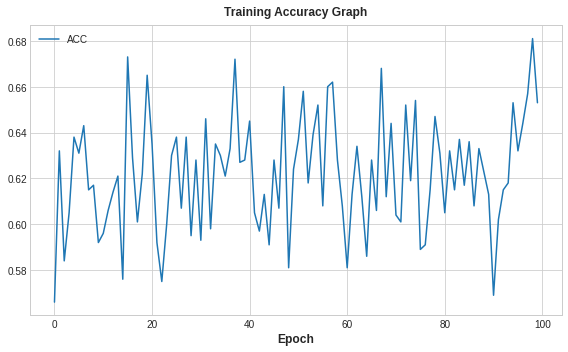

In [29]:
plt.figure(figsize=[8, 5])
plt.plot(range(100), acc_list, label="ACC")
plt.title("Training Accuracy Graph")
plt.xlabel("Epoch")
plt.legend(loc='upper left')

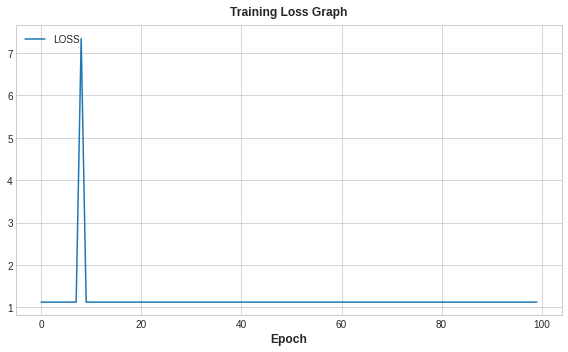

In [28]:
plt.figure(figsize=[8, 5])
plt.plot(range(100), loss_list, label="LOSS")
plt.title("Training Loss Graph")
plt.xlabel("Epoch")
plt.legend(loc='upper left')

In [30]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data_t, labels in test_loader:
        data_t=data_t.unsqueeze(1)
        data_t, labels = data_t.to(device), labels.to(device)
        
        outputs = model(data_t.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model: {} %'.format((correct / total) * 100))

Test Accuracy of the model: 3.0 %
